In [94]:
import pandas as pd
import numpy as np
#loading the file customer.csv
customer = pd.read_csv('/Users/ryaol/Developer/Python/3rdTerm/UnsupervisedLearning/COMP257_UnspLearning_Grp08/Customers.csv')
print(customer.shape)
customer.head()


(2000, 8)


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [95]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [96]:
#printing the unique values in descending order for each column
for column in customer.columns:
    print(column)
    print(customer[column].sort_values(ascending=False).unique())
    print('\n')



 

CustomerID
[2000 1999 1998 ...    3    2    1]


Gender
['Male' 'Female']


Age
[99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76
 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52
 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28
 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4
  3  2  1  0]


Annual Income ($)
[189974 189945 189709 ...   2000   1000      0]


Spending Score (1-100)
[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1   0]


Profession
['Marketing' 'Lawyer' 'Homemaker' 'Healthcare' 'Executive' 'Entertainment'
 'Engineer' 'Doctor' '

In [97]:
#dropping the missing values
customer_cleaned = customer.dropna()

#deleting the column customerID
del customer_cleaned['CustomerID']

customer_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1965 non-null   object
 1   Age                     1965 non-null   int64 
 2   Annual Income ($)       1965 non-null   int64 
 3   Spending Score (1-100)  1965 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         1965 non-null   int64 
 6   Family Size             1965 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 122.8+ KB


In [98]:
customer_cleaned.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,48.894656,110616.009669,51.078880,4.092621,3.757252
std,28.414889,45833.860195,27.977176,3.926459,1.968335
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,73.000000,149095.000000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


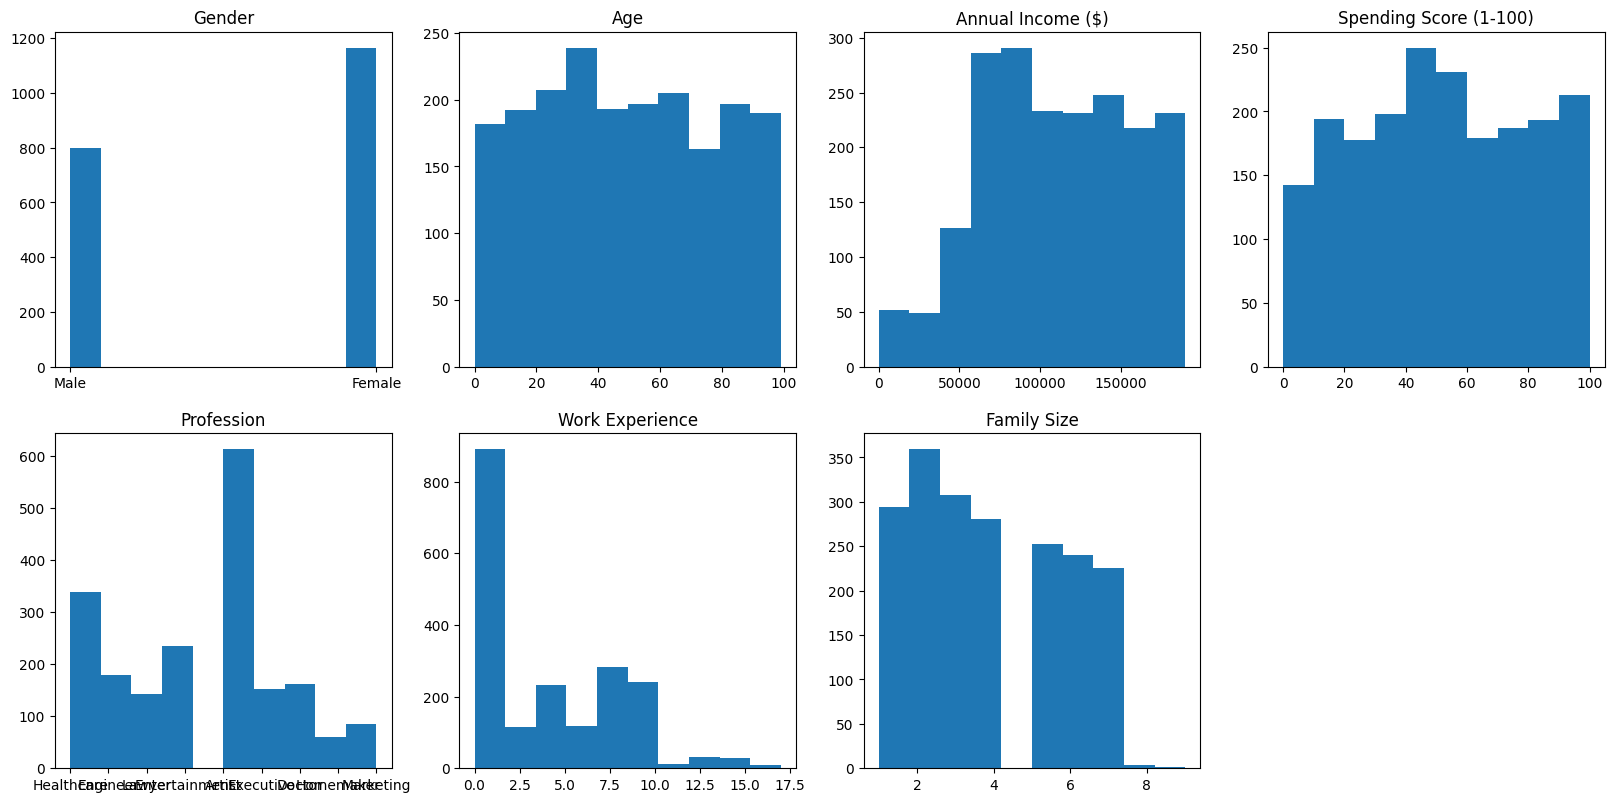

In [99]:
#plotting in subplots the distribution of each column
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
i = 1
plt.figure(figsize=(20, 20))
for column in customer_cleaned.columns:
    plt.subplot(4, 4, i)
    plt.hist(customer_cleaned[column])
    plt.title(column)
    i += 1
plt.show()


In [143]:
#converting gender column 'Male' to 1 and 'Female' to 0
customer_cleaned2 = customer_cleaned.copy()
gender_mapping = {'Male': 1, 'Female': 0}
customer_cleaned2['Gender'] = customer_cleaned['Gender'].map(gender_mapping)
customer_cleaned2['Gender'].unique() 

array([1, 0])

In [144]:
#converting categorical columns to numerical columns using one hot encoding
categorical_columns = ['Profession']
customer_cleaned2 = pd.get_dummies(customer_cleaned2, columns=categorical_columns, dtype=int)
customer_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    1965 non-null   int64
 1   Age                       1965 non-null   int64
 2   Annual Income ($)         1965 non-null   int64
 3   Spending Score (1-100)    1965 non-null   int64
 4   Work Experience           1965 non-null   int64
 5   Family Size               1965 non-null   int64
 6   Profession_Artist         1965 non-null   int64
 7   Profession_Doctor         1965 non-null   int64
 8   Profession_Engineer       1965 non-null   int64
 9   Profession_Entertainment  1965 non-null   int64
 10  Profession_Executive      1965 non-null   int64
 11  Profession_Healthcare     1965 non-null   int64
 12  Profession_Homemaker      1965 non-null   int64
 13  Profession_Lawyer         1965 non-null   int64
 14  Profession_Marketing      1965 non-null   int

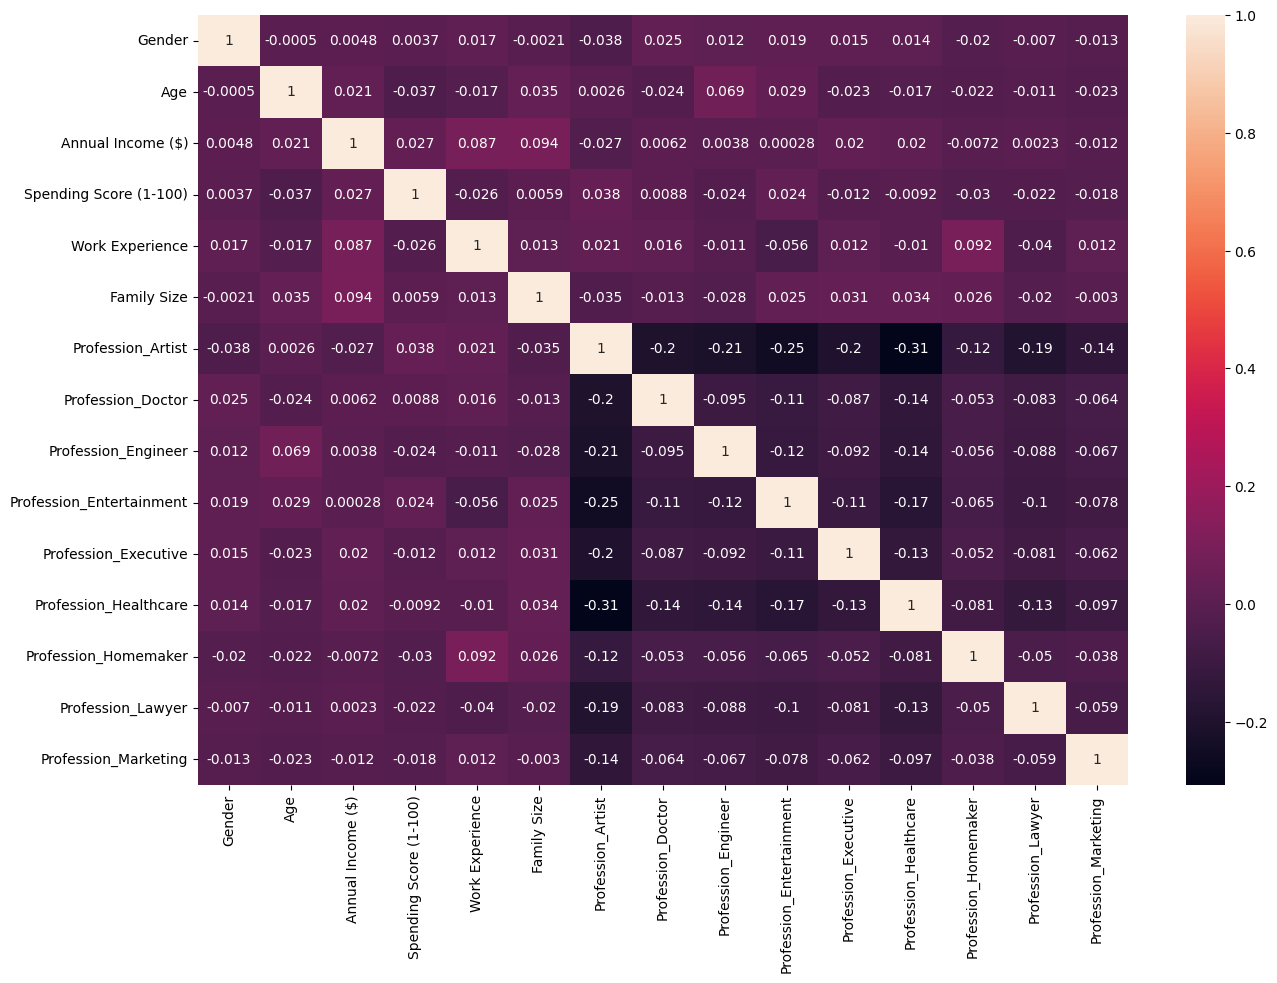

In [145]:
#plotting the correlation matrix
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(customer_cleaned2.corr(), annot=True)
plt.show()

In [146]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_cleaned_scaled = scaler.fit_transform(customer_cleaned2)
customer_cleaned_scaled = pd.DataFrame(customer_cleaned_scaled, columns=customer_cleaned2.columns)
#print(customer_cleaned_scaled.head())
print(customer_cleaned_scaled.describe())



             Gender           Age  Annual Income ($)  Spending Score (1-100)  \
count  1.965000e+03  1.965000e+03       1.965000e+03            1.965000e+03   
mean  -5.423990e-18 -1.301758e-16      -8.678385e-17            1.139038e-16   
std    1.000255e+00  1.000255e+00       1.000255e+00            1.000255e+00   
min   -8.277975e-01 -1.721179e+00      -2.414027e+00           -1.826199e+00   
25%   -8.277975e-01 -8.411343e-01      -7.914507e-01           -8.251281e-01   
50%   -8.277975e-01 -3.149350e-02      -1.870294e-02           -3.857269e-02   
75%    1.208025e+00  8.485509e-01       8.397457e-01            8.552403e-01   
max    1.208025e+00  1.763797e+00       1.731868e+00            1.749053e+00   

       Work Experience   Family Size  Profession_Artist  Profession_Doctor  \
count     1.965000e+03  1.965000e+03       1.965000e+03       1.965000e+03   
mean      1.446397e-17 -4.339192e-17      -5.514390e-17       1.355998e-17   
std       1.000255e+00  1.000255e+00       1.

In [147]:
#applying PCA to plot the data in 2 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
customer_cleaned_pca = pca.fit_transform(customer_cleaned_scaled)
print(customer_cleaned_pca.shape)
#printing the explained variance ratio
print(pca.explained_variance_ratio_.sum())

(1965, 2)
0.17196636728301545


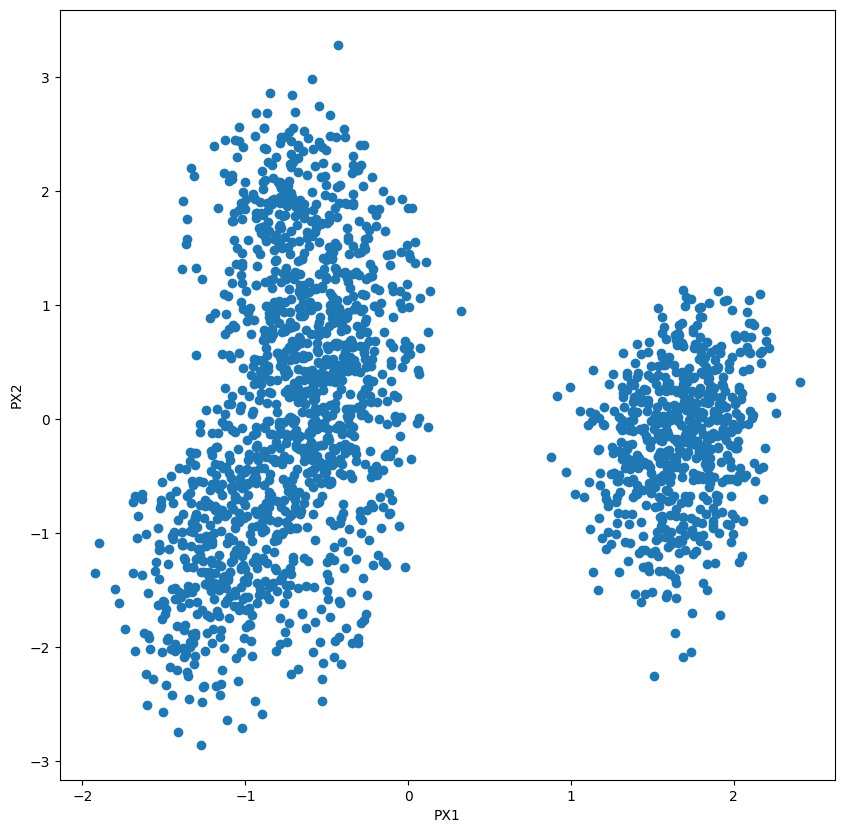

In [148]:
#plotting the data in 2 dimensions
plt.figure(figsize=(10, 10))
plt.scatter(customer_cleaned_pca[:, 0], customer_cleaned_pca[:, 1])
plt.xlabel('PX1')
plt.ylabel('PX2')
plt.show()


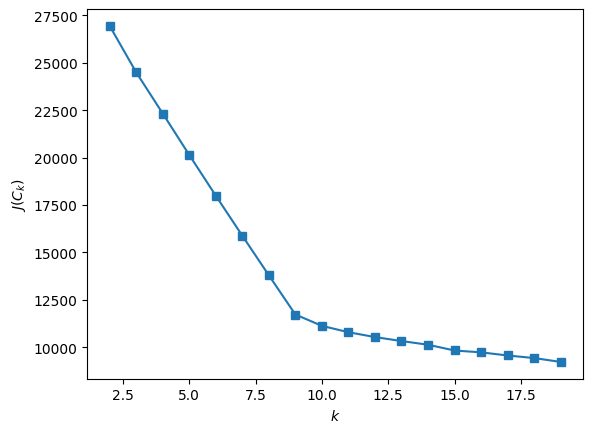

In [149]:
#using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
inertia = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(customer_cleaned_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 20), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

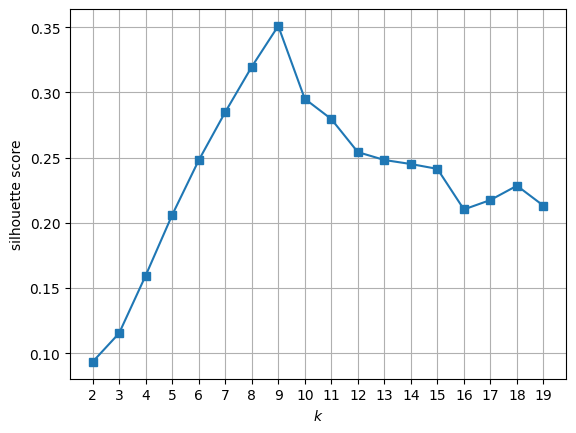

In [150]:
#using the silhouette score to find the optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(customer_cleaned_scaled)
    silhouette.append(silhouette_score(customer_cleaned_scaled, kmeans.labels_))
plt.plot(range(2, 20), silhouette, marker='s')
plt.xticks(range(2, 20))
plt.xlabel('$k$')
plt.ylabel('silhouette score')
plt.grid(True)
plt.show()


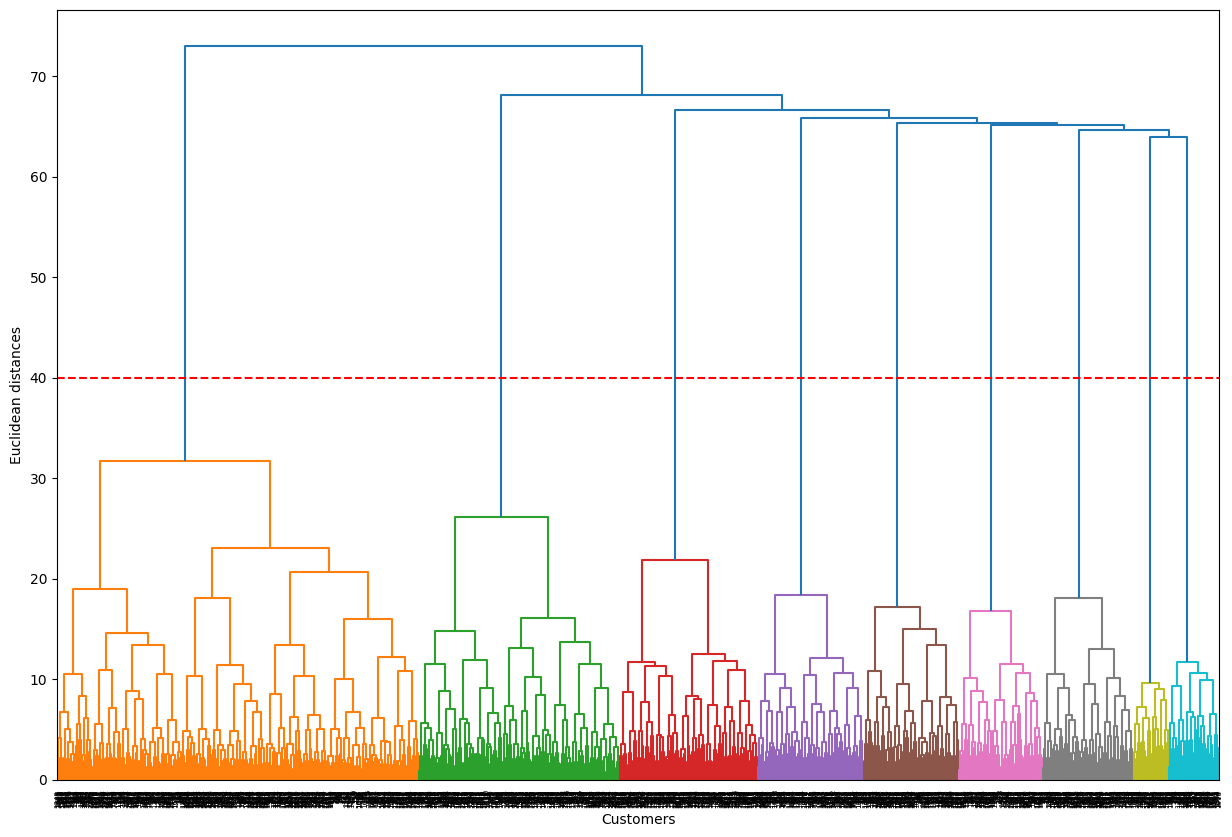

In [162]:
#using agglomerative clustering to plot the dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(customer_cleaned_scaled, method='ward'))
#tracing the horizontal line with distance equals 40
plt.axhline(y=40, color='r', linestyle='--')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [163]:
#After analysing the dendrogram, the inertia elbow and silhouette score we can see that the optimal number of clusters is 9.
#applying kmeans clustering with 10 clusters
kmeans_9 = KMeans(n_clusters=9, random_state=42, n_init=10).fit(customer_cleaned_scaled)
np.set_printoptions(threshold=1000) #(threshold=np.inf)
print(kmeans_9.labels_)

[1 2 2 ... 1 3 0]


In [164]:
#creating a dataframe with the cluster labels
customer_cleaned_scaled_clustered = customer_cleaned_scaled.copy()
customer_cleaned_scaled_clustered['cluster'] = kmeans_9.labels_
print(customer_cleaned_scaled_clustered.head())

     Gender       Age  Annual Income ($)  Spending Score (1-100)  \
0  1.208025 -1.052345          -2.086675               -0.431850   
1  1.208025 -0.981941          -1.650205                1.069755   
2 -0.827798 -1.017143          -0.537207               -1.611684   
3 -0.827798 -0.911538          -1.126441                0.926745   
4 -0.827798 -0.629924          -1.584734               -0.396098   

   Work Experience  Family Size  Profession_Artist  Profession_Doctor  \
0        -0.787837     0.123358          -0.672553          -0.298741   
1        -0.278342    -0.384815          -0.672553          -0.298741   
2        -0.787837    -1.401161          -0.672553          -0.298741   
3        -1.042584    -0.892988          -0.672553          -0.298741   
4        -0.533089     1.139704          -0.672553          -0.298741   

   Profession_Engineer  Profession_Entertainment  Profession_Executive  \
0            -0.316582                 -0.367671             -0.290581   
1   

In [165]:
#analysing the clusters
customer_cleaned_scaled_clustered.groupby('cluster').mean()


,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
cluster,,,,,,,,,,,,,,,
0,0.050912,0.079828,0.000749,0.066546,-0.150969,0.066894,-0.672553,-0.298741,-0.316582,2.719823,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633
1,0.030971,-0.036997,0.042731,-0.020116,-0.022843,0.075389,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,2.190082,-0.177471,-0.279094,-0.212633
2,0.036574,0.218262,0.011899,-0.075524,-0.034980,-0.089564,-0.672553,-0.298741,3.158742,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633
3,0.050400,-0.080730,0.068834,-0.042078,0.039676,0.106751,-0.672553,-0.298741,-0.316582,-0.367671,3.441386,-0.456604,-0.177471,-0.279094,-0.212633
4,-0.056048,0.003881,-0.040143,0.057176,0.031351,-0.052676,1.486871,-0.298741,-0.316582,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633
5,0.082632,-0.080033,0.020890,0.029379,0.053937,-0.043929,-0.672553,3.347382,-0.316582,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,-0.212633
6,-0.024938,-0.040170,0.008289,-0.079361,-0.143793,-0.069891,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,-0.456604,-0.177471,3.583019,-0.212633
7,-0.115260,-0.124192,-0.040535,-0.167878,0.519866,0.148767,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,-0.456604,5.634714,-0.279094,-0.212633
8,-0.061370,-0.108109,-0.057217,-0.084420,0.054328,-0.014148,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,-0.456604,-0.177471,-0.279094,4.702940


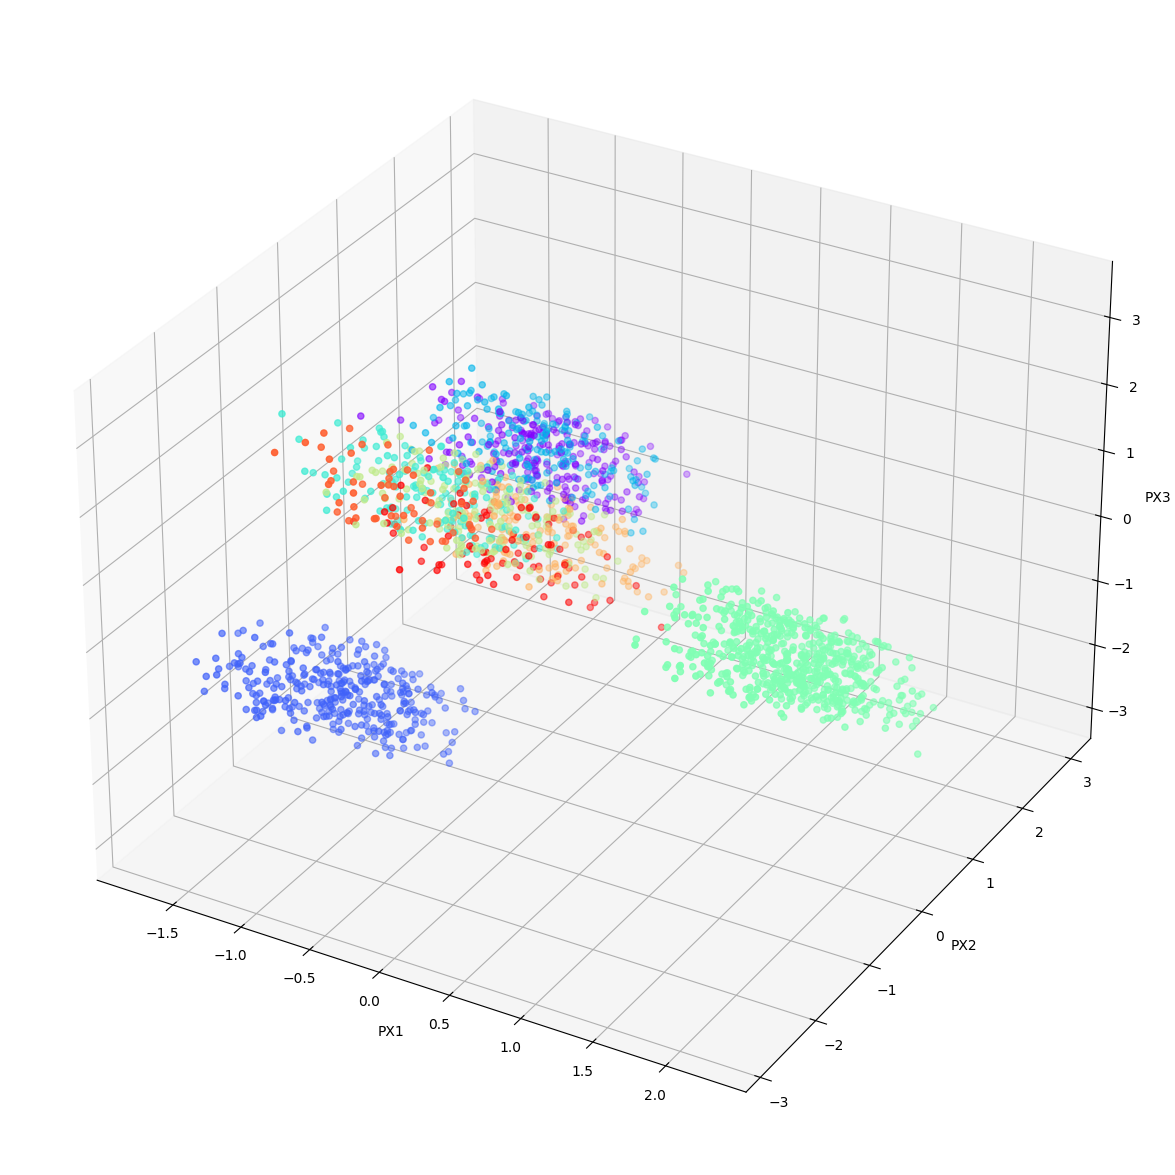

In [166]:
#plotting the clusters in 3 dimensions
customer_pca3 = PCA(n_components=3).fit_transform(customer_cleaned_scaled)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_pca3[:,0], customer_pca3[:,1], customer_pca3[:,2], c=customer_cleaned_scaled_clustered['cluster'], cmap='rainbow')
ax.set_xlabel('PX1')
ax.set_ylabel('PX2')
ax.set_zlabel('PX3')
plt.show()

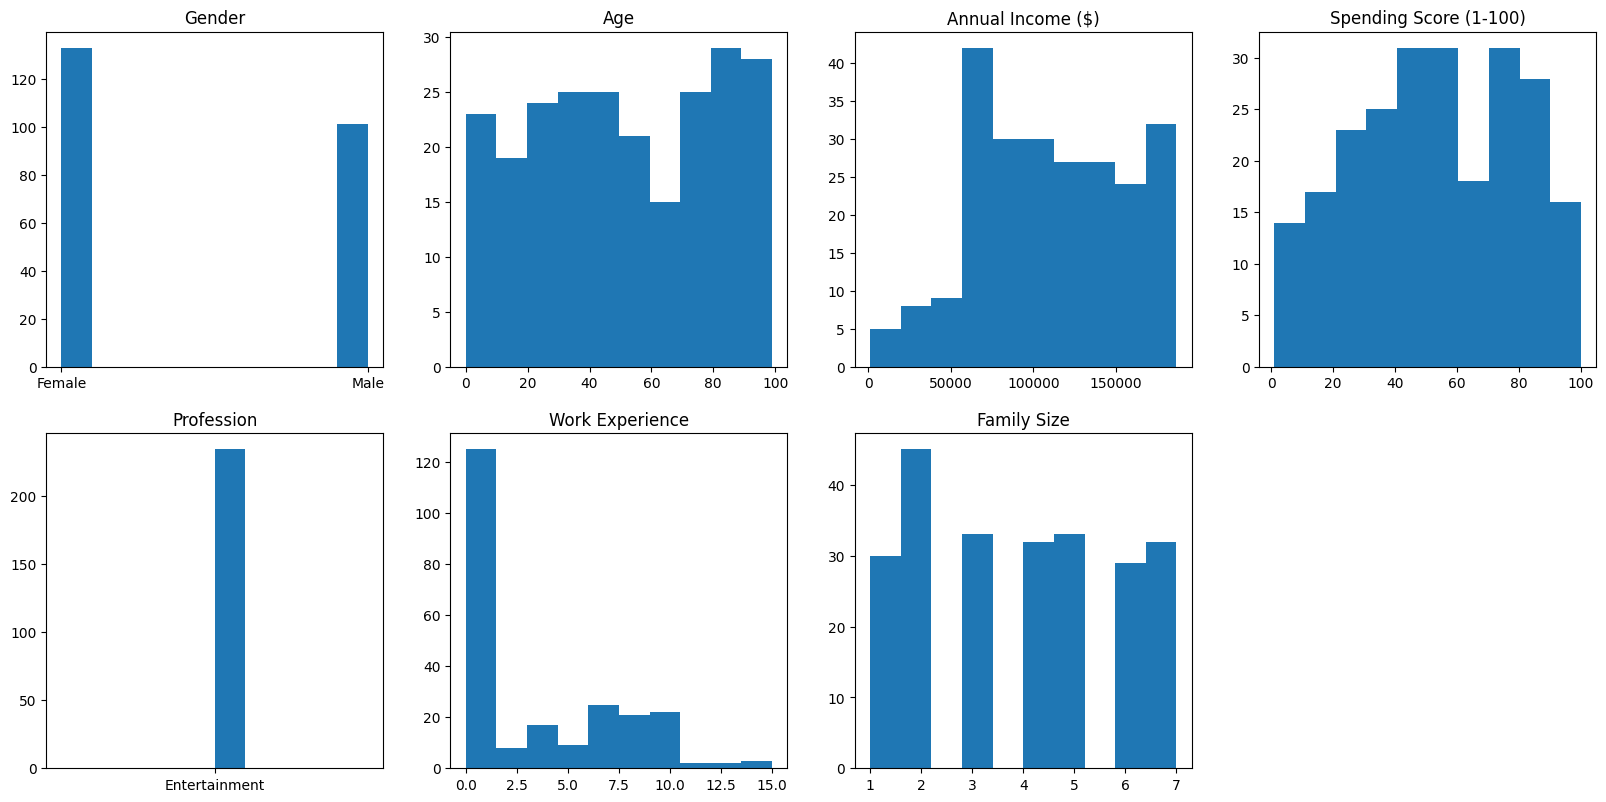

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.0
mean,51.162393,110650.333333,52.940171,3.500000,3.888889,0.0
std,29.384372,45001.884572,26.455985,3.710847,1.983960,0.0
min,0.000000,1000.000000,1.000000,0.000000,1.000000,0.0
25%,27.000000,73497.500000,32.000000,1.000000,2.000000,0.0
50%,50.000000,109446.000000,53.000000,1.000000,4.000000,0.0
75%,79.000000,148479.500000,75.750000,7.000000,6.000000,0.0
max,99.000000,186882.000000,100.000000,15.000000,7.000000,0.0


In [167]:
data_customer_clustered = customer_cleaned.copy()
data_customer_clustered['cluster'] = kmeans_9.labels_
data_customer_cluster1 = data_customer_clustered[data_customer_clustered['cluster'] == 0]
data_customer_cluster2 = data_customer_clustered[data_customer_clustered['cluster'] == 1]
data_customer_cluster3 = data_customer_clustered[data_customer_clustered['cluster'] == 2]
data_customer_cluster4 = data_customer_clustered[data_customer_clustered['cluster'] == 3]
data_customer_cluster5 = data_customer_clustered[data_customer_clustered['cluster'] == 4]
data_customer_cluster6 = data_customer_clustered[data_customer_clustered['cluster'] == 5]
data_customer_cluster7 = data_customer_clustered[data_customer_clustered['cluster'] == 6]
data_customer_cluster8 = data_customer_clustered[data_customer_clustered['cluster'] == 7]
data_customer_cluster9 = data_customer_clustered[data_customer_clustered['cluster'] == 8]
data_customer_cluster10 = data_customer_clustered[data_customer_clustered['cluster'] == 9]

#plotting the histogram of each cluster
data_temp = data_customer_cluster1
i = 1
plt.figure(figsize=(20, 20))
for column in data_temp.columns[:-1]:
    plt.subplot(4, 4, i)
    plt.hist(data_temp[column])
    plt.title(column)
    i += 1
plt.show()

data_temp.describe()

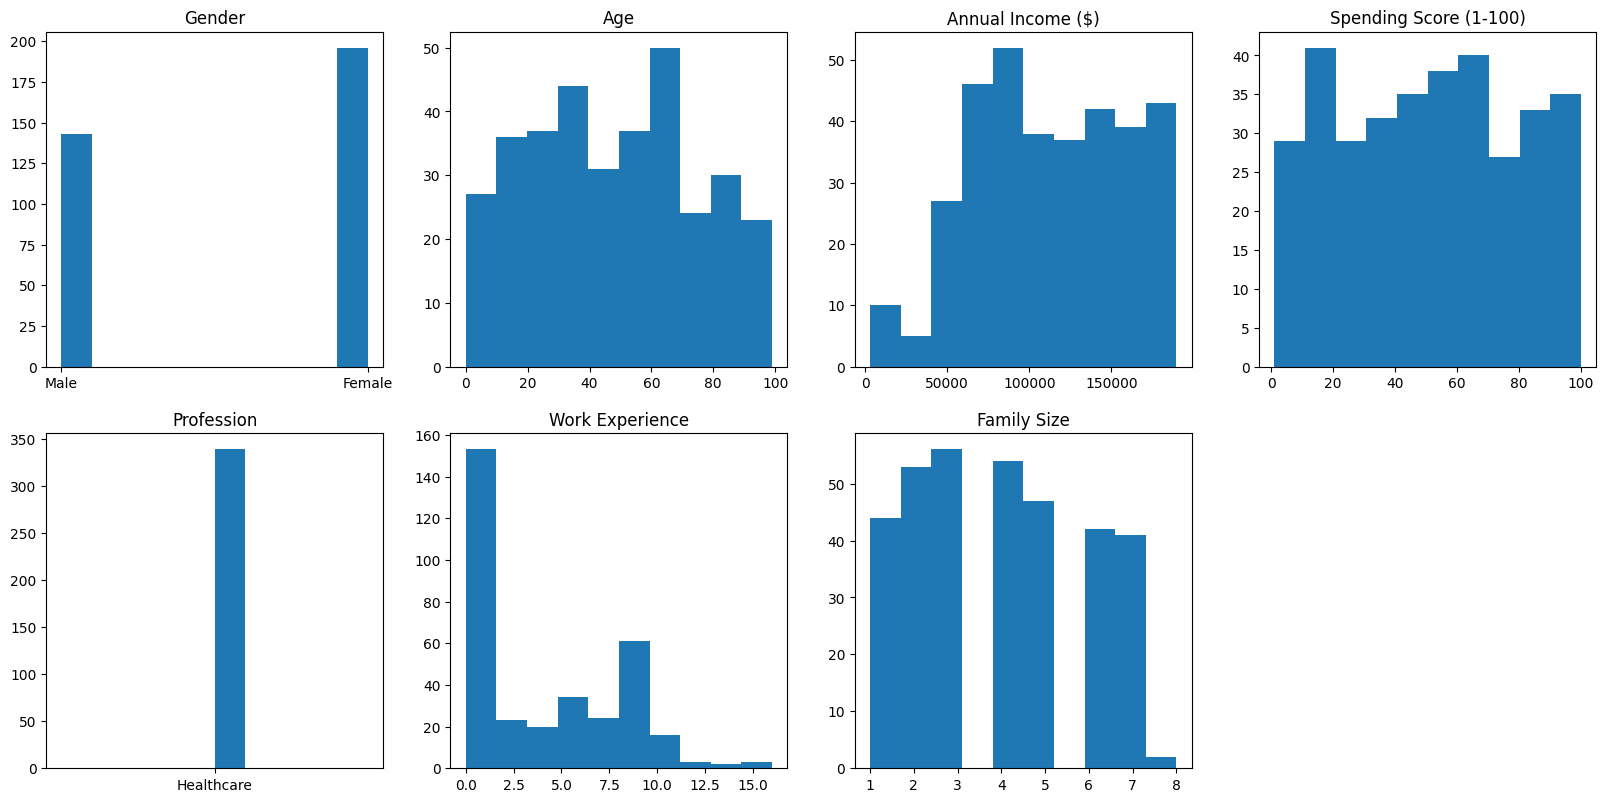

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.0
mean,47.843658,112574.041298,50.516224,4.002950,3.905605,1.0
std,27.256871,45426.143104,28.344492,3.796992,1.943719,0.0
min,0.000000,3000.000000,1.000000,0.000000,1.000000,1.0
25%,24.000000,76475.500000,26.000000,1.000000,2.000000,1.0
50%,47.000000,111717.000000,51.000000,3.000000,4.000000,1.0
75%,68.000000,151050.500000,74.000000,7.500000,5.500000,1.0
max,99.000000,189689.000000,100.000000,16.000000,8.000000,1.0


In [168]:
#plotting the histogram of each cluster
data_temp = data_customer_cluster2
i = 1
plt.figure(figsize=(20, 20))
for column in data_temp.columns[:-1]:
    plt.subplot(4, 4, i)
    plt.hist(data_temp[column])
    plt.title(column)
    i += 1
plt.show()
data_temp.describe()

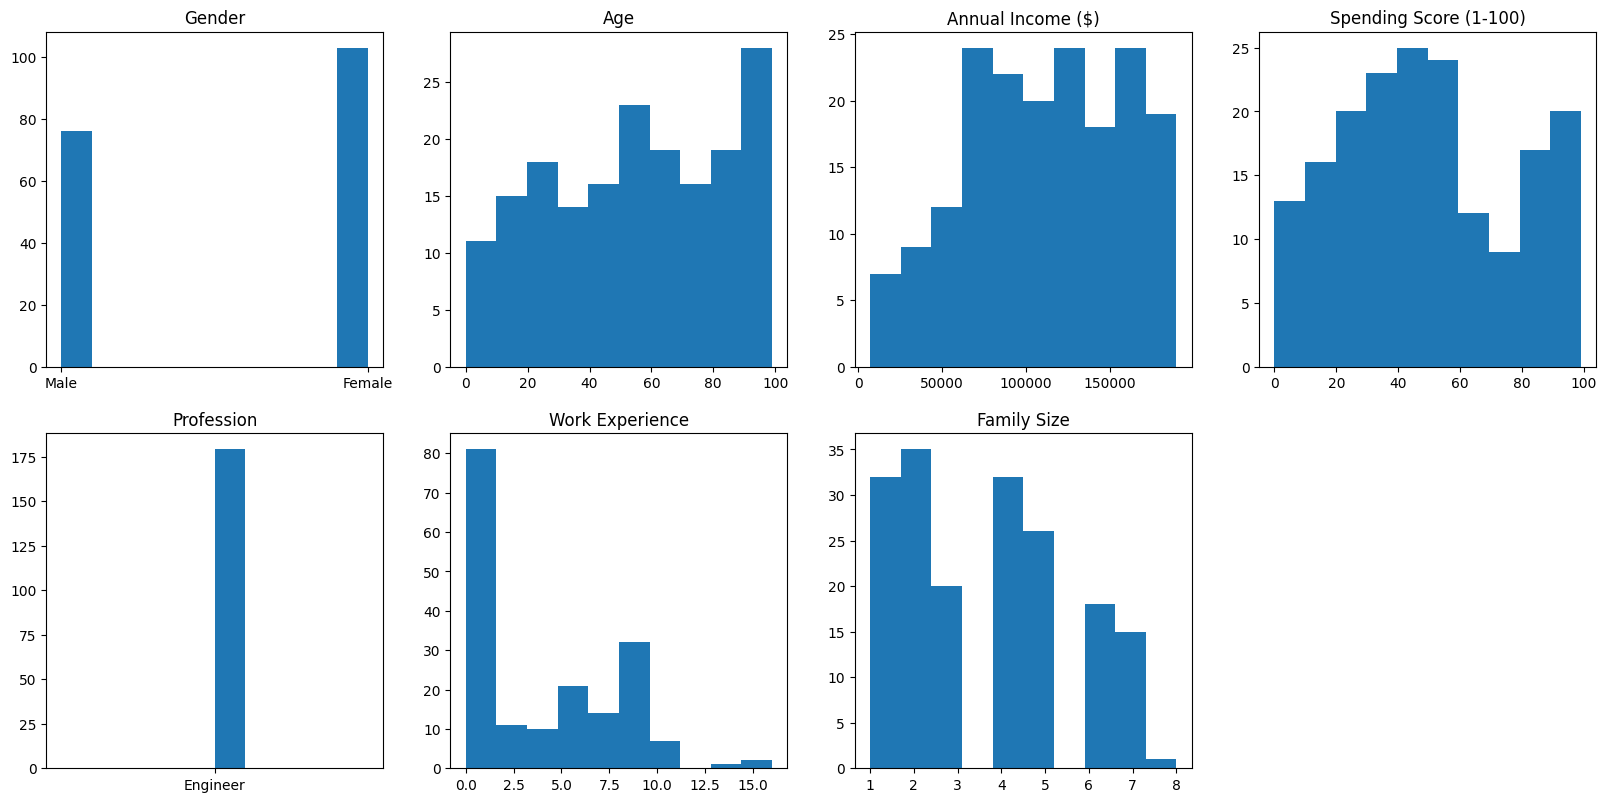

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.0
mean,55.094972,111161.240223,48.966480,3.955307,3.581006,2.0
std,28.626556,46503.822115,27.733868,3.738385,1.933698,0.0
min,0.000000,7000.000000,0.000000,0.000000,1.000000,2.0
25%,30.500000,76260.500000,27.000000,1.000000,2.000000,2.0
50%,58.000000,112766.000000,47.000000,3.000000,4.000000,2.0
75%,80.000000,151230.000000,71.500000,7.000000,5.000000,2.0
max,99.000000,189974.000000,99.000000,16.000000,8.000000,2.0


In [169]:
#plotting the histogram of each cluster
data_temp = data_customer_cluster3
i = 1
plt.figure(figsize=(20, 20))
for column in data_temp.columns[:-1]:
    plt.subplot(4, 4, i)
    plt.hist(data_temp[column])
    plt.title(column)
    i += 1
plt.show()
data_temp.describe()

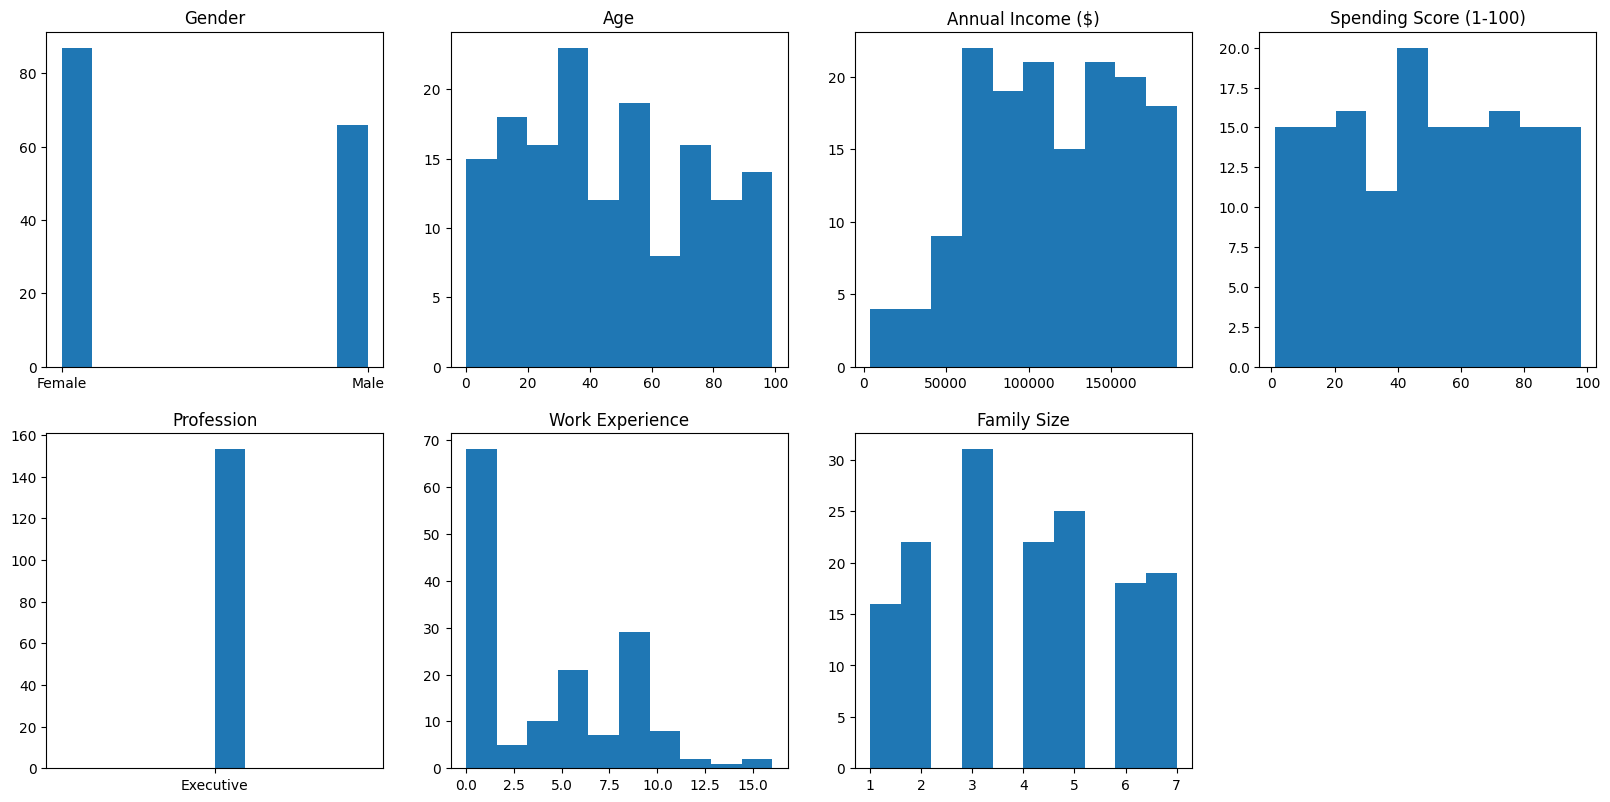

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.0
mean,46.601307,113770.130719,49.901961,4.248366,3.967320,3.0
std,28.321077,45434.149328,28.102202,3.955810,1.868782,0.0
min,0.000000,4000.000000,1.000000,0.000000,1.000000,3.0
25%,25.000000,77873.000000,28.000000,1.000000,3.000000,3.0
50%,45.000000,112957.000000,49.000000,4.000000,4.000000,3.0
75%,72.000000,150782.000000,74.000000,8.000000,5.000000,3.0
max,99.000000,189630.000000,98.000000,16.000000,7.000000,3.0


In [170]:
#plotting the histogram of each cluster
data_temp = data_customer_cluster4
i = 1
plt.figure(figsize=(20, 20))
for column in data_temp.columns[:-1]:
    plt.subplot(4, 4, i)
    plt.hist(data_temp[column])
    plt.title(column)
    i += 1
plt.show()
data_temp.describe()

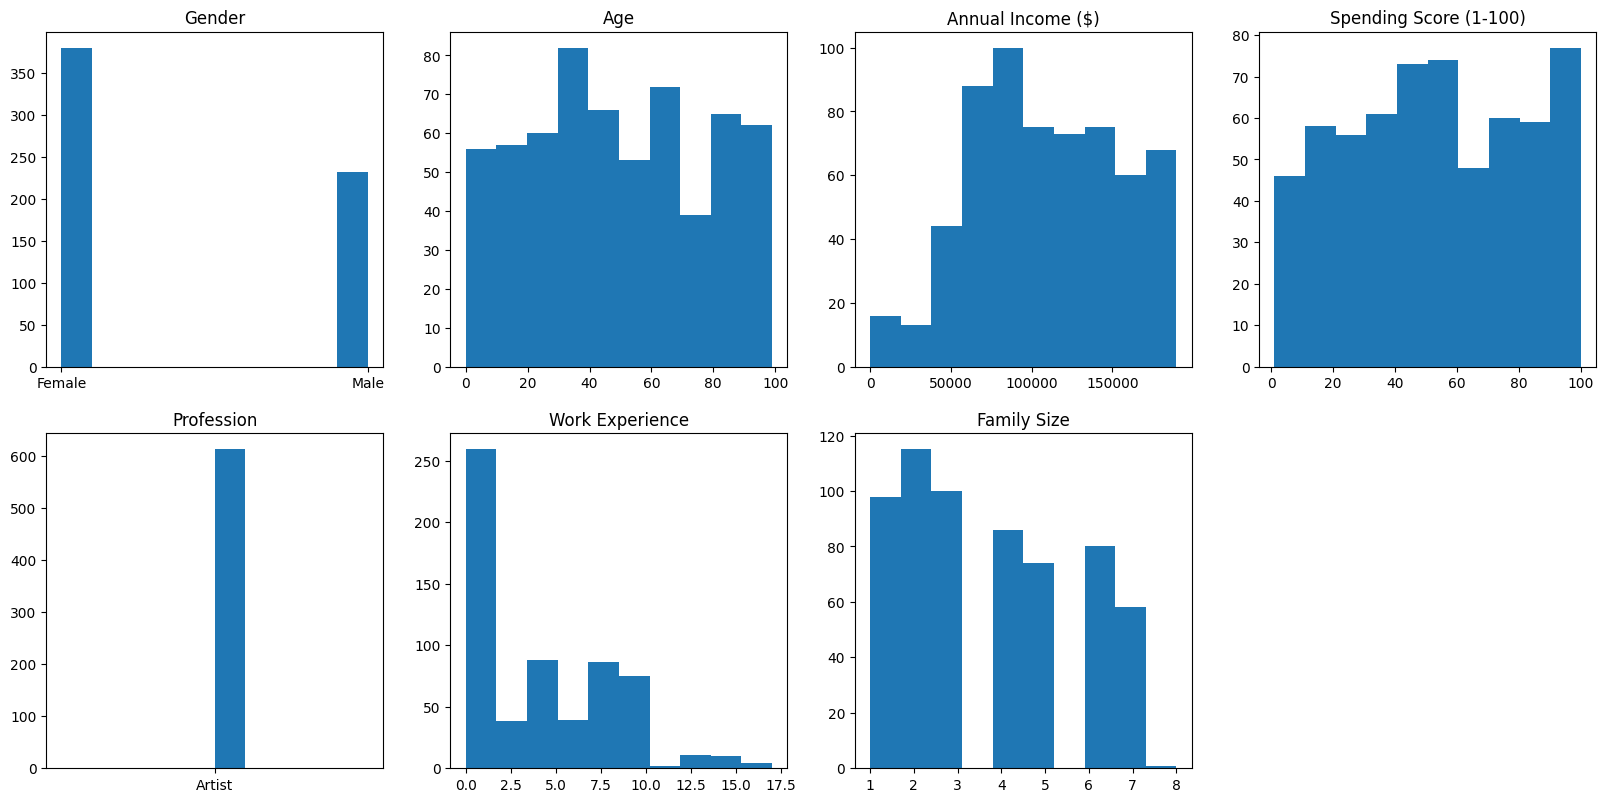

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.0
mean,49.004902,108776.580065,52.678105,4.215686,3.653595,4.0
std,28.238839,45430.821575,28.404190,3.938465,1.940423,0.0
min,0.000000,0.000000,1.000000,0.000000,1.000000,4.0
25%,25.000000,73122.750000,28.750000,1.000000,2.000000,4.0
50%,47.000000,105211.000000,52.000000,4.000000,3.000000,4.0
75%,72.000000,146370.500000,77.000000,7.000000,5.000000,4.0
max,99.000000,189709.000000,100.000000,17.000000,8.000000,4.0


In [171]:
#plotting the histogram of each cluster
data_temp = data_customer_cluster5
i = 1
plt.figure(figsize=(20, 20))
for column in data_temp.columns[:-1]:
    plt.subplot(4, 4, i)
    plt.hist(data_temp[column])
    plt.title(column)
    i += 1
plt.show()
data_temp.describe()

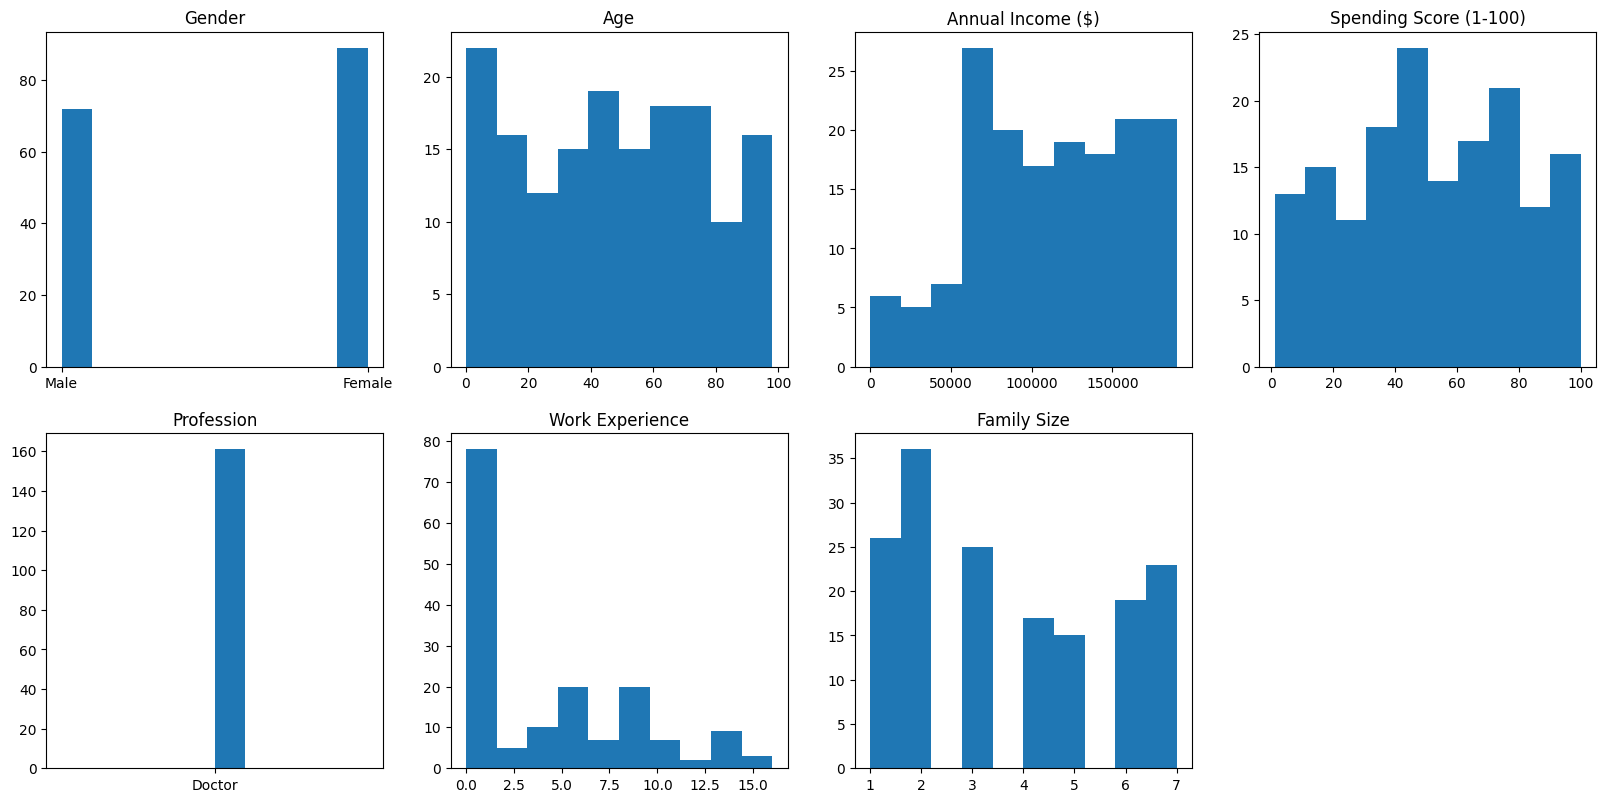

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.0
mean,46.621118,111573.217391,51.900621,4.304348,3.670807,5.0
std,28.771067,48261.233502,27.437703,4.411694,2.066931,0.0
min,0.000000,0.000000,1.000000,0.000000,1.000000,5.0
25%,21.000000,73892.000000,32.000000,1.000000,2.000000,5.0
50%,48.000000,111871.000000,50.000000,2.000000,3.000000,5.0
75%,71.000000,154821.000000,77.000000,8.000000,6.000000,5.0
max,98.000000,189672.000000,100.000000,16.000000,7.000000,5.0


In [172]:
#plotting the histogram of each cluster
data_temp = data_customer_cluster6
i = 1
plt.figure(figsize=(20, 20))
for column in data_temp.columns[:-1]:
    plt.subplot(4, 4, i)
    plt.hist(data_temp[column])
    plt.title(column)
    i += 1
plt.show()
data_temp.describe()

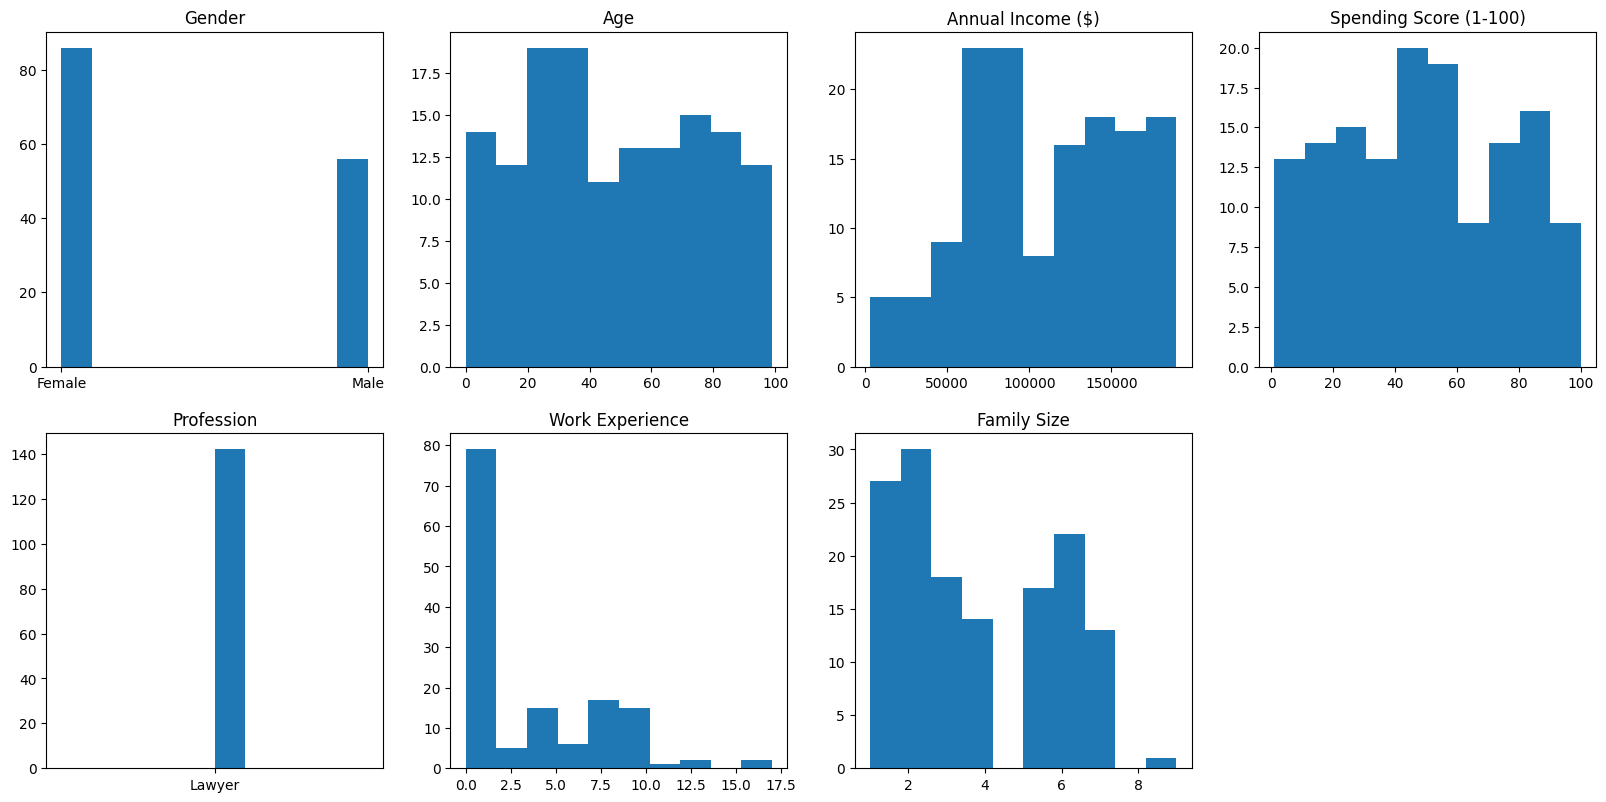

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.0
mean,47.753521,110995.838028,48.859155,3.528169,3.619718,6.0
std,28.360693,47793.706749,27.718594,3.909787,2.075635,0.0
min,0.000000,3000.000000,1.000000,0.000000,1.000000,6.0
25%,25.000000,74277.250000,24.250000,1.000000,2.000000,6.0
50%,48.000000,113338.500000,49.000000,1.000000,3.000000,6.0
75%,72.750000,150881.250000,74.000000,7.000000,5.750000,6.0
max,99.000000,189650.000000,100.000000,17.000000,9.000000,6.0


In [173]:
#plotting the histogram of each cluster
data_temp = data_customer_cluster7
i = 1
plt.figure(figsize=(20, 20))
for column in data_temp.columns[:-1]:
    plt.subplot(4, 4, i)
    plt.hist(data_temp[column])
    plt.title(column)
    i += 1
plt.show()
data_temp.describe()

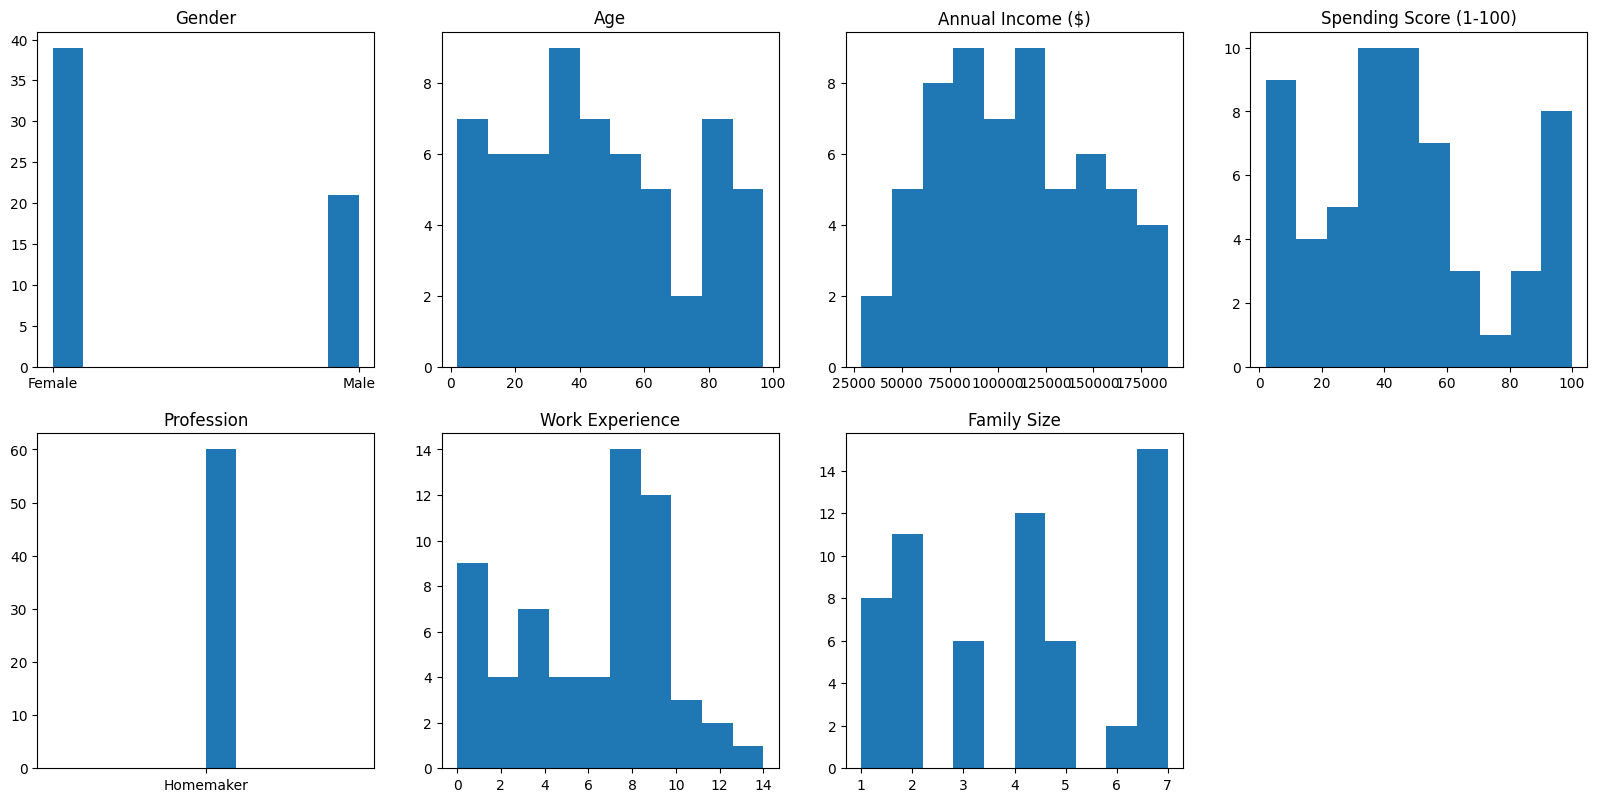

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,45.366667,108758.616667,46.383333,6.133333,4.050000,7.0
std,27.938168,40393.442633,28.394373,3.510115,2.142587,0.0
min,2.000000,29000.000000,2.000000,0.000000,1.000000,7.0
25%,22.000000,78213.250000,28.500000,3.000000,2.000000,7.0
50%,41.000000,100387.000000,45.500000,7.000000,4.000000,7.0
75%,68.000000,135993.750000,59.750000,9.000000,6.250000,7.0
max,97.000000,188696.000000,100.000000,14.000000,7.000000,7.0


In [174]:
#plotting the histogram of each cluster
data_temp = data_customer_cluster8
i = 1
plt.figure(figsize=(20, 20))
for column in data_temp.columns[:-1]:
    plt.subplot(4, 4, i)
    plt.hist(data_temp[column])
    plt.title(column)
    i += 1
plt.show()
data_temp.describe()

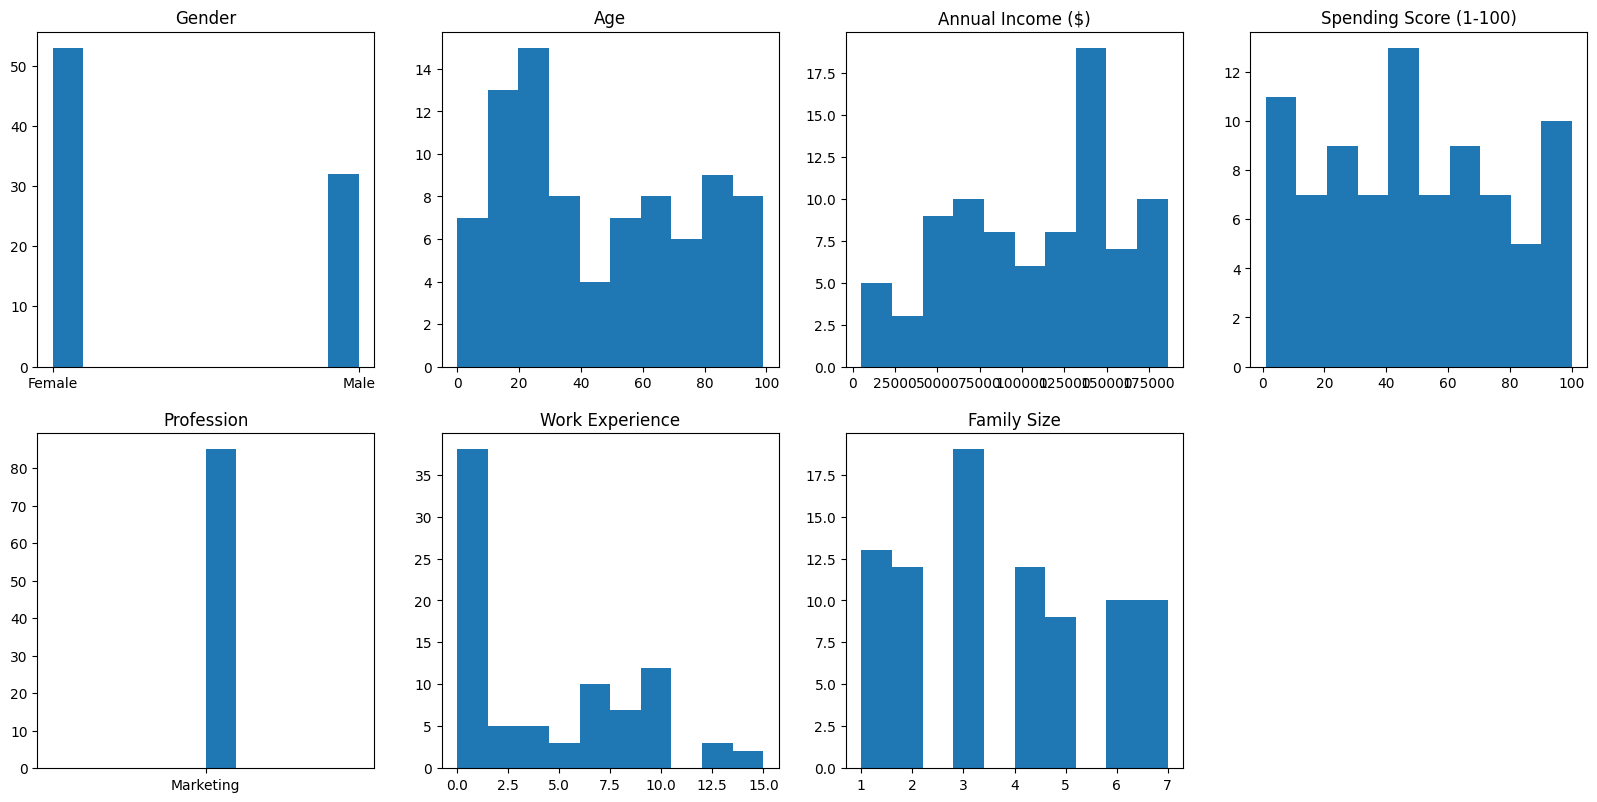

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,cluster
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.0
mean,45.823529,107994.211765,48.717647,4.305882,3.729412,8.0
std,29.819367,48772.573140,28.924208,4.154812,1.941945,0.0
min,0.000000,5000.000000,1.000000,0.000000,1.000000,8.0
25%,20.000000,65483.000000,25.000000,1.000000,2.000000,8.0
50%,38.000000,120899.000000,46.000000,2.000000,3.000000,8.0
75%,71.000000,145704.000000,73.000000,8.000000,5.000000,8.0
max,99.000000,186069.000000,100.000000,15.000000,7.000000,8.0


In [175]:
#plotting the histogram of each cluster
data_temp = data_customer_cluster9
i = 1
plt.figure(figsize=(20, 20))
for column in data_temp.columns[:-1]:
    plt.subplot(4, 4, i)
    plt.hist(data_temp[column])
    plt.title(column)
    i += 1
plt.show()
data_temp.describe()